# Article - Semi-Implicit Multistep Extrapolation ODE Solvers

-  http://dx.doi.org/10.3390/math8060943


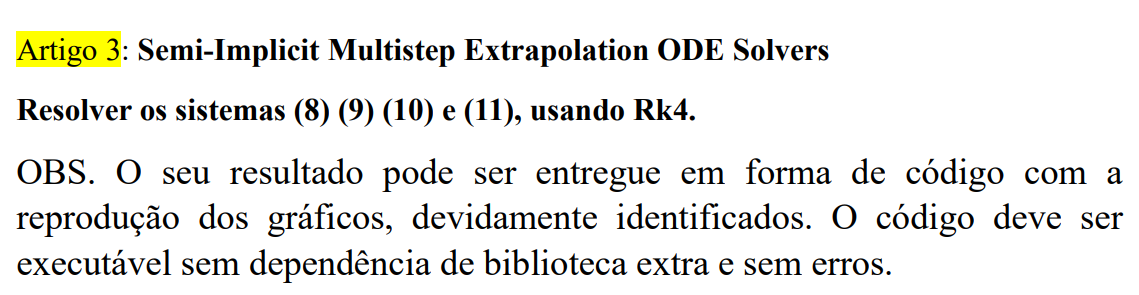

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# %run "C:/Users/gabim/OneDrive/Documentos/UFOPA/11° Semestre/Modelagem Computacional/Artigos_Solution/Artigo2.ipynb"

In [3]:
def runge_kutta(t, y0, h, n):
    y = np.zeros((n, 3)) 
    y[0] = y0
    for i in range(n - 1):
        k1 = h * f(t[i], y[i])
        k2 = h * f(t[i] + h / 2, y[i] + k1 / 2)
        k3 = h * f(t[i] + h / 2, y[i] + k2 / 2)
        k4 = h * f(t[i] + h, y[i] + k3)
        y[i + 1] = y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return y

## 8 - System Rössler Attractor 

In [4]:
## System Rössler Attractor
def f(t, y):
    a = 0.2
    b = 0.2
    c = 5.7
    x, y, z = y
    dxdt = - y - z
    dydt = x + a * y
    dzdt = b + z * (x - c)
    return np.array([dxdt, dydt, dzdt])

##Condições iniciais

t = [0.001, 0.002, 0.003, 0.006, 0.008, 0.01, 0.015, 0.02]
y0 = np.array([1.0, 1.0, 1.0])  # Condições iniciais da tabela 3 
# y0 = np.array([0.0, 0.0, 0.0])  # Condições iniciais para o array de tamanho 3
h = 0.01
n = len(t)

##Implementação do método
runge_kutta_rossler = runge_kutta(t, y0, h, n)

In [5]:
# Gráfico Rossler
Rossler_df = pd.DataFrame.from_dict({
    'Tempo': t,
    'Rossler_dXdt': runge_kutta_rossler[:, 0],
    'Rossler_dYdt': runge_kutta_rossler[:, 1],
    'Rossler_dZdt': runge_kutta_rossler[:, 2],
}, orient = 'index')

Rossler_df = Rossler_df.transpose()
# results_df.to_csv('resultados.csv', index=False)
Rossler_df

,Tempo,Rossler_dXdt,Rossler_dYdt,Rossler_dZdt
0,0.001,1.000000,1.000000,1.000000
1,0.002,0.980162,1.011912,0.955946
2,0.003,0.960637,1.023652,0.913739
3,0.006,0.941409,1.035221,0.873313
4,0.008,0.922461,1.046622,0.834603
5,0.010,0.903779,1.057857,0.797546
6,0.015,0.885349,1.068929,0.762079
7,0.020,0.867155,1.079841,0.728143


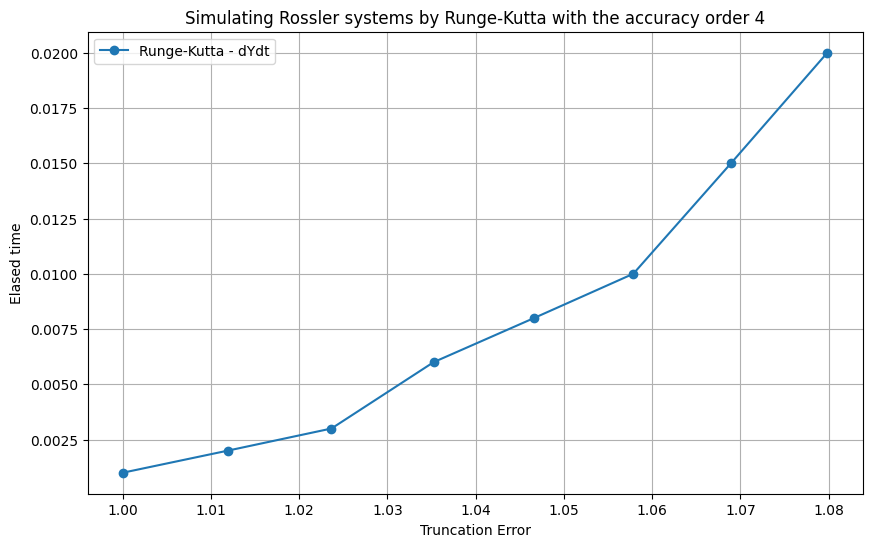

In [6]:
plt.figure(figsize=(10, 6))

# plt.plot(Rossler_df['Rossler_dXdt'], Rossler_df['Tempo'], label='Runge-Kutta - Ct', marker='o' )
plt.plot(Rossler_df['Rossler_dYdt'], Rossler_df['Tempo'], label='Runge-Kutta - dYdt', marker='o')
# plt.plot(Rossler_df['Rossler_dZdt'], Rossler_df['Tempo'], label='Runge-Kutta - Dt')

plt.xlabel('Truncation Error')
plt.ylabel('Elased time')
plt.legend()
plt.grid(True)
plt.title('Simulating Rossler systems by Runge-Kutta with the accuracy order 4')
plt.show()

## 9 - Sprott System Case A

In [7]:
# Sprott System Case A 
def f(t, y):
    a = 1
    b = 1
#     x = y[0]
#     y1 = y[1]
#     z = y[2]
    x, y1, z = y
    dxdt = a * y1
    dydt = -x + y1 * z
    dzdt = b - y1**2
    return np.array([dxdt, dydt, dzdt])

##Condições iniciais
# t = [0.04, 0.03, 0.025, 0.02, 0.015, 0.012, 0.01, 0.008]
t = [0.008, 0.01, 0.012, 0.015, 0.02, 0.025, 0.03, 0.04]
y0 = np.array([1.0, 1.0, 1.0])  # Condições iniciais da tabela 3 
# y0 = np.array([0.0, 0.0, 0.0])  #Condições iniciais para o array de tamanho 3
h = 0.01
n = len(t)

##Implementação do método
sprott_caseA = runge_kutta(t, y0, h, n)

In [8]:
# Gráfico Rossler
sys_sprott_caseA = pd.DataFrame.from_dict({
    'Tempo': t,
    'CaseA_dXdt': sprott_caseA[:, 0],
    'CaseA_dYdt': sprott_caseA[:, 1],
    'CaseA_dZdt': sprott_caseA[:, 2],
}, orient = 'index')

sys_sprott_caseA = sys_sprott_caseA.transpose()
# results_df.to_csv('resultados.csv', index=False)
sys_sprott_caseA

,Tempo,CaseA_dXdt,CaseA_dYdt,CaseA_dZdt
0,0.008,1.000000,1.000000,1.000000
1,0.010,1.010000,0.999950,1.000000
2,0.012,1.019999,0.999799,1.000003
3,0.015,1.029995,0.999546,1.000009
4,0.020,1.039989,0.999190,1.000022
5,0.025,1.049979,0.998730,1.000042
6,0.030,1.059963,0.998165,1.000073
7,0.040,1.069942,0.997495,1.000116


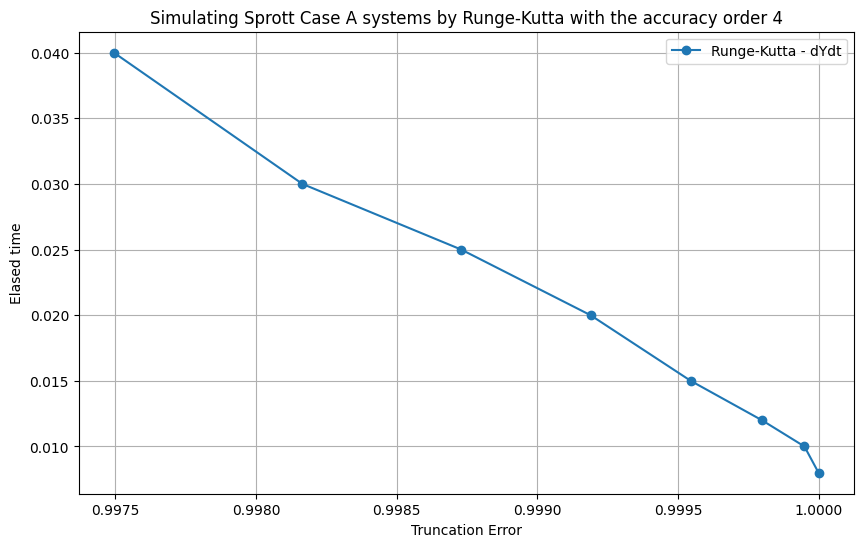

In [9]:
plt.figure(figsize=(10, 6))
# plt.plot(sys_sprott_caseA['CaseA_dXdt''], sys_sprott_caseA['Tempo'], label='Runge-Kutta - Ct', )
plt.plot(sys_sprott_caseA['CaseA_dYdt'], sys_sprott_caseA['Tempo'], label='Runge-Kutta - dYdt', marker='o')
# plt.plot(sys_sprott_caseA['CaseA_dZdt'], sys_sprott_caseA['Tempo'], label='Runge-Kutta - Dt')
plt.xlabel('Truncation Error')
plt.ylabel('Elased time')
plt.legend()
plt.grid(True)
plt.title('Simulating Sprott Case A systems by Runge-Kutta with the accuracy order 4')
plt.show()

## 10 - Sprott System Case E

In [10]:
# Sprott System Case E
def f(t,y):
    a = 1
    b = 1
    d = 1
#     x = y[0]
#     y1 = y[1]
#     z = y[2]
    x, y1, z = y
    dxdt = y1 * z
    dydt = (x**2) - y1
    dzdt = d - 4*x
    return np.array([dxdt, dydt, dzdt])

##Condições iniciais
# t = [0.085, 0.07, 0.055, 0.04, 0.03, 0.02, 0.01, 0.005]
t = [0.008, 0.01, 0.012, 0.015, 0.02, 0.025, 0.03, 0.04]
y0 = np.array([1.0, 0.0, -2.0])  # Condições iniciais da tabela 5
# y0 = np.array([0.0, 0.0, 0.0])  #Condições iniciais para o array de tamanho 3
h = 0.01
n = len(t)

##Implementação do método
sprott_caseE= runge_kutta(t, y0, h, n)

In [11]:
# Gráfico Rossler
sys_sprott_caseE = pd.DataFrame.from_dict({
    'Tempo': t,
    'CaseE_dXdt': sprott_caseE[:, 0],
    'CaseE_dYdt': sprott_caseE[:, 1],
    'CaseE_dZdt': sprott_caseE[:, 2],
}, orient = 'index')

sys_sprott_caseE = sys_sprott_caseE.transpose()
# results_df.to_csv('resultados.csv', index=False)
sys_sprott_caseE

,Tempo,CaseE_dXdt,CaseE_dYdt,CaseE_dZdt
0,0.008,1.000000,0.000000,-2.000000
1,0.010,0.999899,0.009949,-2.029999
2,0.012,0.999595,0.019796,-2.059989
3,0.015,0.999083,0.029536,-2.089963
4,0.020,0.998359,0.039168,-2.119913
5,0.025,0.997421,0.048686,-2.149829
6,0.030,0.996265,0.058090,-2.179704
7,0.040,0.994887,0.067374,-2.209528


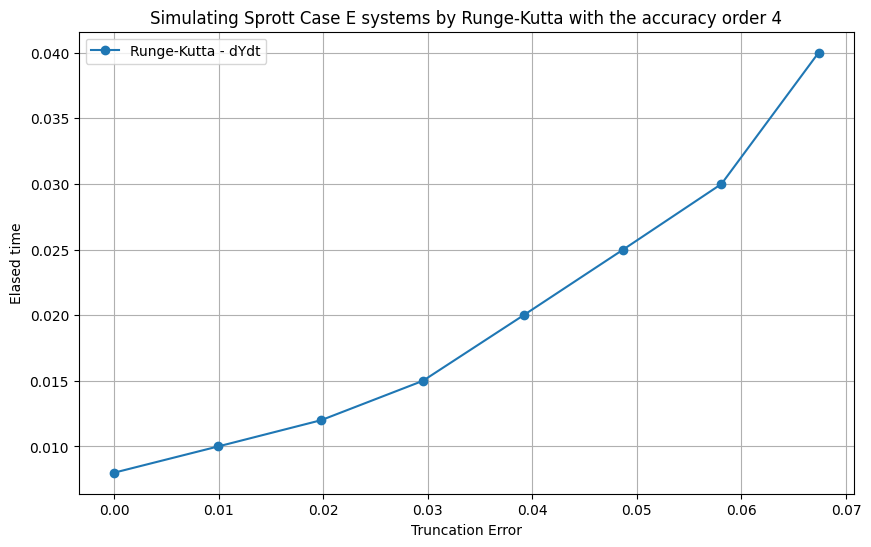

In [12]:
plt.figure(figsize=(10, 6))
# plt.plot(sys_sprott_caseE['CaseE_dXdt''], sys_sprott_caseE['Tempo'], label='Runge-Kutta - Ct', )
plt.plot(sys_sprott_caseE['CaseE_dYdt'], sys_sprott_caseE['Tempo'], label='Runge-Kutta - dYdt', marker='o')
# plt.plot(sys_sprott_caseE['CaseE_dZdt'], sys_sprott_caseE['Tempo'], label='Runge-Kutta - Dt')
plt.xlabel('Truncation Error')
plt.ylabel('Elased time')
plt.legend()
plt.grid(True)
plt.title('Simulating Sprott Case E systems by Runge-Kutta with the accuracy order 4')
plt.show()

## 11 - Van der Pol System

In [13]:
# Van der Pol
def f(t,y):
    m = 1
    x, y1 = y
    dxdt = y1
    dydt = m*(1 - x**2)*y1 - x
    return np.array([dxdt, dydt])

def runge_kutta1(t, y0, h, n):
    y = np.zeros((n, 2)) 
    y[0] = y0
    for i in range(n - 1):
        k1 = h * f(t[i], y[i])
        k2 = h * f(t[i] + h / 2, y[i] + k1 / 2)
        k3 = h * f(t[i] + h / 2, y[i] + k2 / 2)
        k4 = h * f(t[i] + h, y[i] + k3)
        y[i + 1] = y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return y

##Condições iniciais
# t = [0.02, 0.015, 0.01, 0.008, 0.006, 0.005, 0.0045, 0.004]
t = [0.004, 0.0045, 0.005, 0.006, 0.008, 0.01, 0.015, 0.02]
y0 = np.array([1.0, 0.0])  #Condições iniciais para o array de tamanho 3
h = 0.01
n = len(t)

##Implementação do método
Van_der_Pol= runge_kutta1(t, y0, h, n)

In [14]:
# Gráfico sys_Van_der_Pol
sys_Van_der_Pol = pd.DataFrame.from_dict({
    'Tempo': t,
    'VanPol_dXdt': Van_der_Pol[:, 0],
    'VanPol_dYdt': Van_der_Pol[:, 1],
}, orient = 'index')

sys_Van_der_Pol = sys_Van_der_Pol.transpose()
# results_df.to_csv('resultados.csv', index=False)
sys_Van_der_Pol

,Tempo,VanPol_dXdt,VanPol_dYdt
0,0.0040,1.000000,0.000000
1,0.0045,0.999950,-0.010000
2,0.0050,0.999800,-0.019999
3,0.0060,0.999550,-0.029996
4,0.0080,0.999200,-0.039990
5,0.0100,0.998750,-0.049981
6,0.0150,0.998201,-0.059967
7,0.0200,0.997551,-0.069949


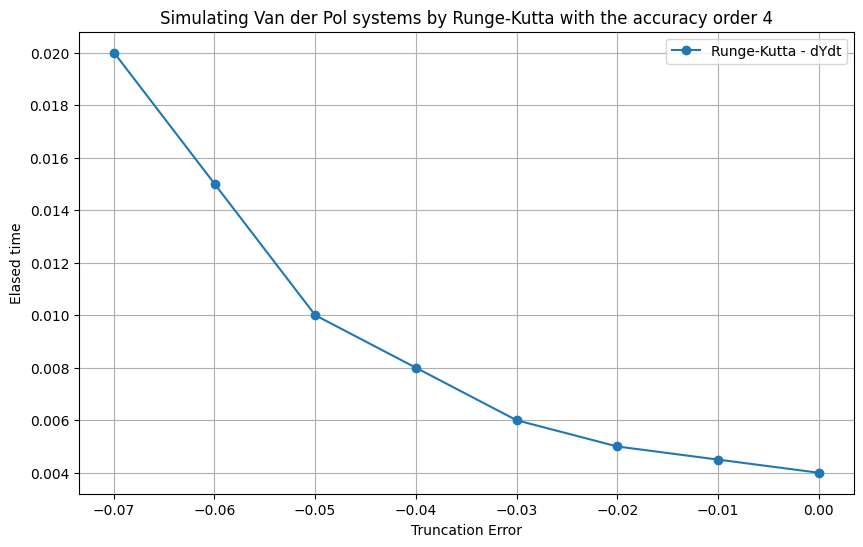

In [15]:
plt.figure(figsize=(10, 6))
# plt.plot(sys_sprott_caseE['VanPol_dXdt''], sys_sprott_caseE['Tempo'], label='Runge-Kutta - Ct', )
plt.plot(sys_Van_der_Pol['VanPol_dYdt'], sys_Van_der_Pol['Tempo'], label='Runge-Kutta - dYdt', marker='o')
plt.xlabel('Truncation Error')
plt.ylabel('Elased time')
plt.legend()
plt.grid(True)
plt.title('Simulating Van der Pol systems by Runge-Kutta with the accuracy order 4')
plt.show()